# Import Libtraries

In [694]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [695]:
path=r"C:\Users\baidy\Downloads\citibike_cleaned.csv"

In [696]:
# Import Data
if os.path.exists(path):
    df=pd.read_csv(path)
    print("file loaded succesfully")
else:
    print(f"file not found:{path}")
    print ("please check if the file path is correct")

file loaded succesfully


# Data Cleaning

In [698]:
df.columns

Index(['trip_id', 'bike_id', 'weekday', 'start_hour', 'start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender', 'age',
       'gender_desc'],
      dtype='object')

In [699]:
df.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,age,gender_desc
0,LnQzQk,16013,Mon,18,<function to_datetime at 0x00000198E628EFC0>,523,W 38 St & 8 Ave,40.754666,-73.991382,<function to_datetime at 0x00000198E628EFC0>,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,50.0,Female
1,IL9boN,15230,Thu,18,<function to_datetime at 0x00000198E628EFC0>,257,Lispenard St & Broadway,40.719392,-74.002472,<function to_datetime at 0x00000198E628EFC0>,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,35.0,Male
2,46clGB,17942,Wed,19,<function to_datetime at 0x00000198E628EFC0>,479,9 Ave & W 45 St,40.760193,-73.991255,<function to_datetime at 0x00000198E628EFC0>,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,29.0,Male
3,v7vdFt,19683,Sat,11,<function to_datetime at 0x00000198E628EFC0>,527,E 33 St & 1 Ave,40.743156,-73.974347,<function to_datetime at 0x00000198E628EFC0>,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,30.0,Female
4,VGBsb5,18024,Sat,18,<function to_datetime at 0x00000198E628EFC0>,521,8 Ave & W 31 St,40.750450,-73.994811,<function to_datetime at 0x00000198E628EFC0>,476,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,1978.0,0,40.0,Unknown


In [700]:
df.shape

(49976, 20)

# Check missing values

In [702]:
# check missing values if any
df.isnull().sum()

trip_id                    0
bike_id                    0
weekday                    0
start_hour                 0
start_time                 0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_time                   0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
trip_duration              0
subscriber                 0
birth_year                 0
gender                     0
age                        0
gender_desc                0
dtype: int64

# There are two columns having missing values , birth_year and age .

In [704]:
# Duplicate check
dups=df.duplicated()

In [705]:
dups.shape

(49976,)

# There are no duplicate values

In [707]:
# check the percentage of missing data
miss_per=(6977/len(df))*100

In [708]:
miss_per

13.960701136545541

In [709]:
# fill in the missing values 
df['birth_year'].fillna(df['birth_year'].median(),inplace=True)

C:\Users\baidy\AppData\Local\Temp\ipykernel_2916\2675501093.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['birth_year'].fillna(df['birth_year'].median(),inplace=True)


In [710]:
# fill in the missing values
df['age'].fillna(df['age'].median(),inplace=True)

C:\Users\baidy\AppData\Local\Temp\ipykernel_2916\921762689.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(),inplace=True)


# Extreme value check

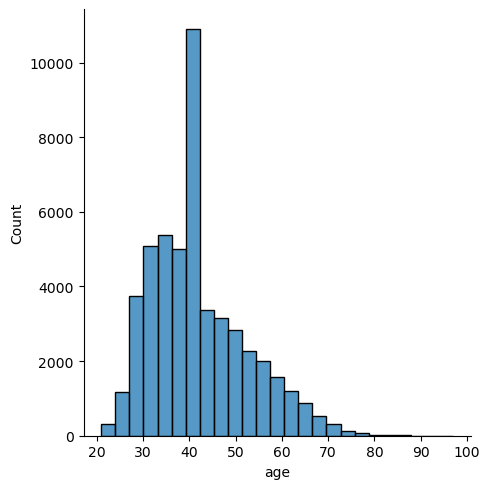

In [712]:
sns.displot(df['age'],bins=25)

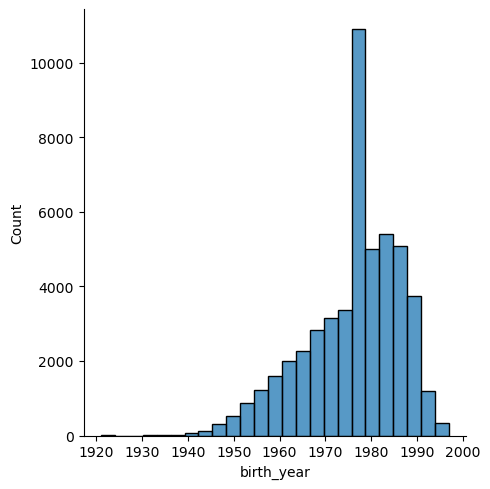

In [713]:
sns.displot(df['birth_year'],bins=25)

# Observation : Some of the outliers in the high values may need to removed , but let's try without doing that so first.

In [715]:
df['birth_year'].mean()

1975.9948975508244

In [716]:
df['birth_year'].median()

1978.0

In [717]:
df['birth_year'].max()

1997.0

In [718]:
df['age'].mean()

42.0051024491756

In [719]:
df['age'].median()

40.0

In [720]:
df['age'].max()

97.0

In [721]:
df.describe()

,bike_id,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration,birth_year,gender,age
count,49976.000000,49976.000000,49976.000000,49976.000000,49976.000000,49976.000000,49976.000000,49976.000000,49976.000000,49976.000000,49976.000000,49976.000000
mean,17615.225748,14.146070,443.309409,40.734170,-73.991106,442.518929,40.733860,-73.991348,838.880243,1975.994898,1.073575,42.005102
std,1675.193546,4.860639,356.568768,0.019911,0.012552,355.691082,0.019885,0.012569,573.681203,10.189296,0.589528,10.189296
min,14556.000000,0.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,60.000000,1921.000000,0.000000,21.000000
25%,16188.000000,10.000000,304.000000,40.720196,-74.000271,304.000000,40.720196,-74.001547,417.000000,1970.000000,1.000000,35.000000
50%,17584.000000,15.000000,402.000000,40.735877,-73.990765,402.000000,40.735354,-73.991218,672.000000,1978.000000,1.000000,40.000000
75%,19014.000000,18.000000,484.000000,40.750020,-73.981923,483.000000,40.749013,-73.982050,1112.000000,1983.000000,1.000000,48.000000
max,20642.000000,23.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,2697.000000,1997.000000,2.000000,97.000000


In [722]:
# create clean Version of the dataset
df_clean=df.copy()

In [723]:
# Convert timestamps to datetime
df_clean['start_time'] = pd.to_datetime
df_clean['end_time'] = pd.to_datetime

In [724]:
# Filter out unrealistic birthdates
df_clean=df_clean[(df_clean['birth_year'].isna())|((df_clean['birth_year']>=1920)&(df_clean['birth_year']<=2005))]

In [725]:
# Create age column (as of 2018 , assuming the data is from 2018)
df_clean['age']=2018-df_clean['birth_year']

In [726]:
# map gender codes to descriptive values
df_clean['gender_desc']=df_clean['gender'].map({0:'Unknown',1:'Male',2:'Female'})

In [727]:
# show the clean data
df_clean.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,age,gender_desc
0,LnQzQk,16013,Mon,18,<function to_datetime at 0x00000198E628EFC0>,523,W 38 St & 8 Ave,40.754666,-73.991382,<function to_datetime at 0x00000198E628EFC0>,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,50.0,Female
1,IL9boN,15230,Thu,18,<function to_datetime at 0x00000198E628EFC0>,257,Lispenard St & Broadway,40.719392,-74.002472,<function to_datetime at 0x00000198E628EFC0>,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,35.0,Male
2,46clGB,17942,Wed,19,<function to_datetime at 0x00000198E628EFC0>,479,9 Ave & W 45 St,40.760193,-73.991255,<function to_datetime at 0x00000198E628EFC0>,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,29.0,Male
3,v7vdFt,19683,Sat,11,<function to_datetime at 0x00000198E628EFC0>,527,E 33 St & 1 Ave,40.743156,-73.974347,<function to_datetime at 0x00000198E628EFC0>,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,30.0,Female
4,VGBsb5,18024,Sat,18,<function to_datetime at 0x00000198E628EFC0>,521,8 Ave & W 31 St,40.750450,-73.994811,<function to_datetime at 0x00000198E628EFC0>,476,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,1978.0,0,40.0,Unknown


In [728]:
#save the clean dataset
df_clean.to_csv('citibike_cleaned.csv',index=False)

# Data preparation and regression analysis

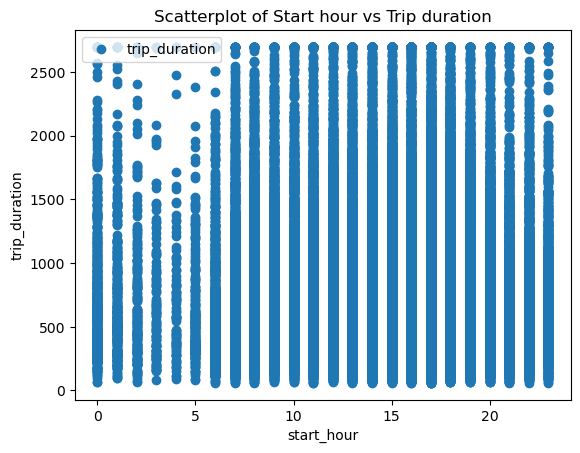

In [730]:
# Create a scatterplot for how the chosen variables plot against each other
df_clean.plot(x='start_hour',y='trip_duration',style='o')
plt.title('Scatterplot of Start hour vs Trip duration')
plt.xlabel('start_hour')
plt.ylabel('trip_duration')
plt.show()

In [731]:
# Reshape the variables into Numpy arrays and put them into separate objects(define independent X and dependent y variables)
X=df_clean['start_hour'].values.reshape(-1,1)
y=df_clean['trip_duration'].values.reshape(-1,1)


In [732]:
X

array([[18],
       [18],
       [19],
       ...,
       [18],
       [13],
       [21]], dtype=int64)

In [733]:
y

array([[ 993],
       [ 581],
       [ 361],
       ...,
       [1050],
       [2697],
       [ 370]], dtype=int64)

In [734]:
# Split the data into a training set and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Regression Analysis

In [736]:
# Create and train the model
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [737]:
# Predict y values for the test set
y_pred=model.predict(X_test)

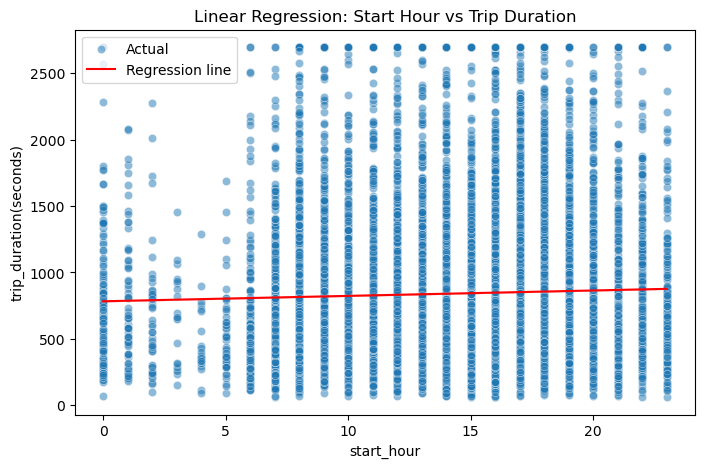

In [738]:
#Plot the regression line
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_test.flatten(),y=y_test.flatten(),alpha=0.5,label='Actual')
sns.lineplot(x=X_test.flatten(),y=y_pred.flatten(),color='red',label='Regression line')
plt.xlabel('start_hour')
plt.ylabel('trip_duration(seconds)')
plt.title('Linear Regression: Start Hour vs Trip Duration')
plt.legend()
plt.show()

In [739]:
# calculate performance metrics
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [740]:
mse,r2

(329922.8999558783, 0.0033462152226002573)

# The models performence metrics are :
Mean Squared Error(MSE): 329922
R2 Score: 0.0033(very close to zero)

# Observation:
The regression line suggests a weak or negligible relationship between start hour and trip duration. The very low R2 value indicates that start hour does not explain much of the variation in trip duration.

# Compare the actual vs predicted values in a dataframe

In [744]:
# Create a dataframe comparing actual and predicted values
comparison_df=pd.DataFrame({'Actual Trip Duration':y_test.flatten(),'Predicted Trip Duration':y_pred.flatten()})

In [745]:
# Display the first few rows
comparison_df.head(30)

,Actual Trip Duration,Predicted Trip Duration
0,680,855.190449
1,578,851.114447
2,1221,863.342451
3,2331,834.810443
4,364,818.506438
5,466,863.342451
6,272,834.810443
7,546,851.114447
8,85,859.266450
9,476,814.430437


# Observation: 
  Based on the calculated metrics; 
 MSE: The MSE is quite high (329922),indicating that the models predictions are significantly deviating from the actual values.This suggest a lack of      precision in predicting trip duration based on start hour.
 R2 : with an R2 of 0.0033, the model explains very little of the variablity in trip duration.Essencially ,start hour is not a strong predictor for        trip duration in this dataset.
  These results imply that the linear regression model struggled to establish a meaningful relationship between the independent variable and the dependent variable.It may be necessary to to explore additional features or use a different type of regression model to improve accuracy. 
  

# Reflections on data bias:

 Possible  sources of bias in the data could include;
  1. Limited Scope: The dataset is specific to citibike trips , meaning it may not generalize well to other transportation scenarios.This could limit the models's predictive power for broader applications.
  2. Temporal and geographic factors: Factors like weather conditions or specific day of week patterns might influence trip duration but are not accounted for in the model.
  3. Imputation of missing values: filling missing values for age and birth year with the median might over simplify the data distribution, introducing bias in the demographic features.


     